In [1]:
import matplotlib.pyplot as plt
from tools.utilities  import json2dict_py, plot_graph, divide_by_threads, json2dict_cpp_updated, json2dict_py_updated, json2dict_fcc_updated, calculate_ratio
import numpy as np

# Results after changing the codes

#### Hard Drive

In [2]:
# number of threads
n_threads            = [i for i in range(1, 65, 1)]

# total number of processed events
total_events         = 10_000_000

# fccanalysis

## with cache releasing
data_fcc_hd_         = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_hd/perf_fccanalysis.json", [1, 65, 1])
### elapsed time
elapsed_fcc_hd_      = data_fcc_hd_["elapsed"]
### real time
real_fcc_hd_         = data_fcc_hd_["real_time"]
### real - elapsed
diff_fcc_hd_         = np.array(real_fcc_hd_) - np.array(elapsed_fcc_hd_)
### events per second
evt_sec_fcc_hd_      = total_events / np.array(elapsed_fcc_hd_)

## without cache releasing
data_fcc_hd_wocr_    = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_hd/perf_fccanalysis_wocr.json", [1, 65, 1])
### elapsed time
elapsed_fcc_hd_wocr_ = data_fcc_hd_wocr_["elapsed"]
### real time
real_fcc_hd_wocr_    = data_fcc_hd_wocr_["real_time"]
### real - elapsed
diff_fcc_hd_wocr_    = np.array(real_fcc_hd_wocr_) - np.array(elapsed_fcc_hd_wocr_)
### events per second
evt_sec_fcc_hd_wocr_ = total_events / np.array(elapsed_fcc_hd_wocr_)

## Ratio wocr/wcr
ratio_cr_fcc_hd_     = np.array(elapsed_fcc_hd_wocr_) / np.array(elapsed_fcc_hd_)
print(f"Average ratio fccanalysis: {round(np.mean(ratio_cr_fcc_hd_), 3)}")


# C++ stand-alone

## with cache releasing
data_cpp_hd_         = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_hd/perf_cpp.json", [1, 65, 1])
### elapsed time
elapsed_cpp_hd_      =  data_cpp_hd_["elapsed"]
### real time
real_cpp_hd_         = data_cpp_hd_["real_time"]
### real - elapsed
diff_cpp_hd_         = np.array(real_cpp_hd_) - np.array(elapsed_cpp_hd_)
### events per second
evt_sec_cpp_hd_      = total_events / np.array(elapsed_cpp_hd_)

## without cache releasing
data_cpp_hd_wocr_    = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_hd/perf_cpp_wocr.json", [1, 65, 1])
### elapsed time
elapsed_cpp_hd_wocr_ = data_cpp_hd_wocr_["elapsed"]
### real time
real_cpp_hd_wocr_    = data_cpp_hd_wocr_["real_time"]
### real - elapsed
diff_cpp_hd_wocr_    = np.array(real_cpp_hd_wocr_) - np.array(elapsed_cpp_hd_wocr_)
### events per second
evt_sec_cpp_hd_wocr_ = total_events / np.array(elapsed_cpp_hd_wocr_)

## Ratio wocr/wcr
ratio_cr_cpp_hd_     = np.array(elapsed_cpp_hd_wocr_) / np.array(elapsed_cpp_hd_)
print(f"Average ratio C++ stand-alone: {round(np.mean(ratio_cr_cpp_hd_), 3)}")

# Python stand-alone

## with cache releasing
data_py_hd_          = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_hd/perf_py.json", [1, 65, 1])
### elapsed time
elapsed_py_hd_       = data_py_hd_["elapsed"]
### real time
real_py_hd_          = data_py_hd_["real_time"]
### real - elapsed
diff_py_hd_          = np.array(real_py_hd_) - np.array(elapsed_py_hd_)
### events per second
evt_sec_py_hd_       = total_events / np.array(elapsed_py_hd_)

## without cache releasing
data_py_hd_wocr_     = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_hd/perf_py_wocr.json", [1, 65, 1])
### elapsed time
elapsed_py_hd_wocr_  = data_py_hd_wocr_["elapsed"]
### real time
real_py_hd_wocr_     = data_py_hd_wocr_["real_time"]
### real - elapsed
diff_py_hd_wocr_     = np.array(real_py_hd_wocr_) - np.array(elapsed_py_hd_wocr_)
### events per second
evt_sec_py_hd_wocr_  = total_events / np.array(elapsed_py_hd_wocr_)

## Ratio wocr/wcr
ratio_cr_py_hd_     = np.array(elapsed_py_hd_wocr_) / np.array(elapsed_py_hd_)
print(f"Average ratio Python stand-alone: {round(np.mean(ratio_cr_py_hd_), 3)}")


# time ratio between different versions
ratio_fcc_cpp_hd_    = np.array(elapsed_fcc_hd_) / np.array(elapsed_cpp_hd_)
ratio_fcc_py_hd_     = np.array(elapsed_fcc_hd_) / np.array(elapsed_py_hd_)
ratio_cpp_py_hd_     = np.array(elapsed_cpp_hd_) / np.array(elapsed_py_hd_)
print("========================================")
print(f"Average ratio fccanalysis vs. C++: {round(np.mean(ratio_fcc_cpp_hd_), 3)}")
print(f"Average ratio fccanalysis vs. Python: {round(np.mean(ratio_fcc_py_hd_), 3)}")
print(f"Average ratio C++ vs. Python: {round(np.mean(ratio_cpp_py_hd_), 3)}")

fraction_fcc_cpp_hd_ = {
    "moreone": len([x for x in ratio_fcc_cpp_hd_ if x >= 1.]),
    "lessone": len([x for x in ratio_fcc_cpp_hd_ if x < 1.])
}
print(fraction_fcc_cpp_hd_["moreone"], fraction_fcc_cpp_hd_["lessone"])

Average ratio fccanalysis: 0.954
Average ratio C++ stand-alone: 0.959
Average ratio Python stand-alone: 0.957
Average ratio fccanalysis vs. C++: 1.043
Average ratio fccanalysis vs. Python: 0.991
Average ratio C++ vs. Python: 0.95
54 10


##### Comparison of all three versions (O2) on hard drive

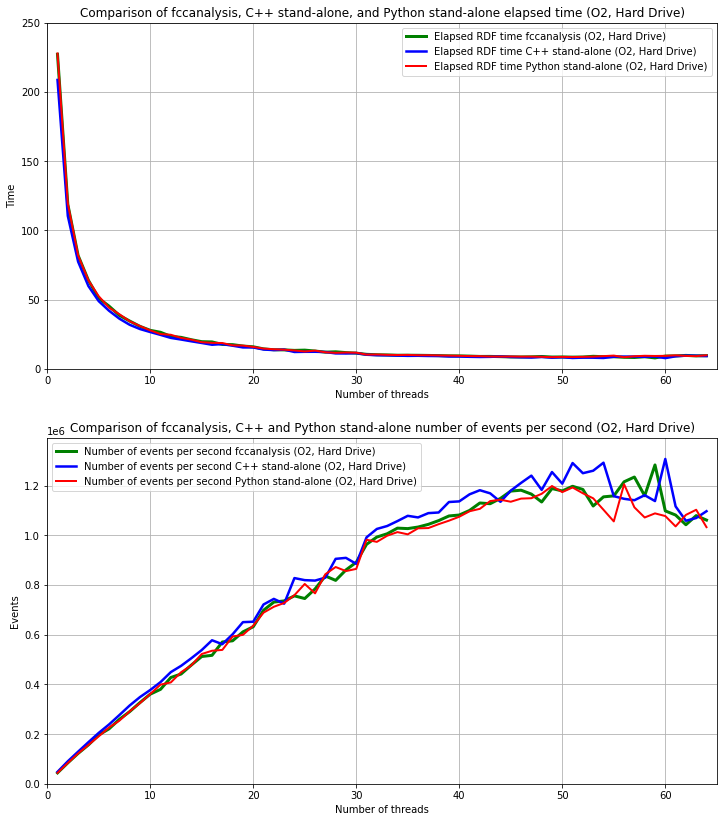

In [3]:
plt.figure(figsize=(12, 14), facecolor='white')
# ax = plt.axes()
# ax.set_yticks([i for i in range(0, 400, 10)])
# ax.set_facecolor('white')
# ax.set_alpha(0.1)
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1)
ax1.plot(n_threads, elapsed_fcc_hd_, color='g', label='Elapsed RDF time fccanalysis (O2, Hard Drive)', linewidth=3)
ax1.plot(n_threads, elapsed_cpp_hd_, color='b', label='Elapsed RDF time C++ stand-alone (O2, Hard Drive)', linewidth=2.5)
ax1.plot(n_threads, elapsed_py_hd_, color='r', label='Elapsed RDF time Python stand-alone (O2, Hard Drive)', linewidth=2)
plt.xlabel("Number of threads")
plt.ylabel("Time")
plt.title("Comparison of fccanalysis, C++ stand-alone, and Python stand-alone elapsed time (O2, Hard Drive)")
ax1.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()

# Plot 2
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1)
ax2.plot(n_threads, evt_sec_fcc_hd_, color='g', label='Number of events per second fccanalysis (O2, Hard Drive)', linewidth=3)
ax2.plot(n_threads, evt_sec_cpp_hd_, color='b', label='Number of events per second C++ stand-alone (O2, Hard Drive)', linewidth=2.5)
ax2.plot(n_threads, evt_sec_py_hd_,  color='r', label='Number of events per second Python stand-alone (O2, Hard Drive)', linewidth=2)
plt.xlabel("Number of threads")
plt.ylabel("Events")
plt.title("Comparison of fccanalysis, C++ and Python stand-alone number of events per second (O2, Hard Drive)")
ax2.grid()
plt.xlim((0, 65))
plt.ylim((0, 1_392_268))
plt.legend()

plt.savefig("/home/ihor/PycharmProjects/fccperf/plots_/elapsed_events_all_O2_hd.pdf", dpi=150)
plt.show()

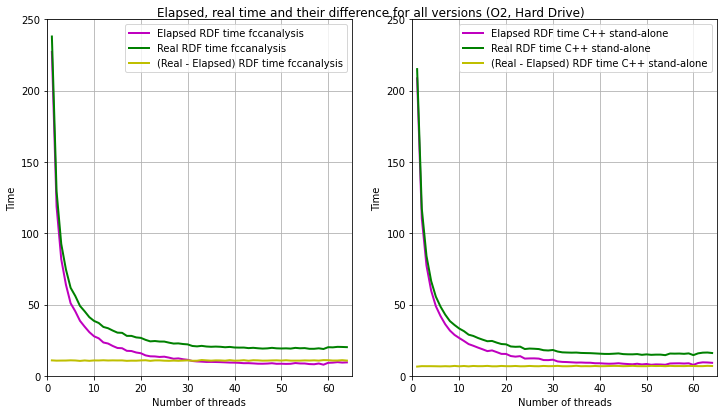

In [4]:
plt.figure(figsize=(12, 6), facecolor="white")
plt.suptitle("Elapsed, real time and their difference for all versions (O2, Hard Drive)")
plt.subplots_adjust(top=0.95)

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.plot(n_threads, elapsed_fcc_hd_, color='m', label='Elapsed RDF time fccanalysis', linewidth=2)
ax1.plot(n_threads, real_fcc_hd_, color='g', label='Real RDF time fccanalysis', linewidth=2)
ax1.plot(n_threads, diff_fcc_hd_, color='y', label='(Real - Elapsed) RDF time fccanalysis', linewidth=2)
plt.xlabel("Number of threads")
plt.ylabel("Time")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()
# plt.show()

# Plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.plot(n_threads, elapsed_cpp_hd_, color='m', label='Elapsed RDF time C++ stand-alone', linewidth=2)
ax2.plot(n_threads, real_cpp_hd_, color='g', label='Real RDF time C++ stand-alone', linewidth=2)
ax2.plot(n_threads, diff_cpp_hd_, color='y', label='(Real - Elapsed) RDF time C++ stand-alone', linewidth=2)
plt.xlabel("Number of threads")
plt.ylabel("Time")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()
#
# # Plot 3
# ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
# ax3.plot(n_threads, elapsed_py_hd_, color='m', label='Elapsed RDF time Python stand-alone', linewidth=2)
# ax3.plot(n_threads, real_py_hd_, color='g', label='Real RDF time Python stand-alone', linewidth=2)
# ax3.plot(n_threads, diff_py_hd_, color='y', label='(Real - Elapsed) RDF time Python stand-alone', linewidth=2)
# plt.xlabel("Number of threads")
# plt.ylabel("Time")
# plt.grid()
# plt.xlim((0, 65))
# plt.ylim((0, 250))
# plt.legend()

# ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

plt.savefig("/home/ihor/PycharmProjects/fccperf/plots_/time_diff_hd.pdf", dpi=150)
plt.show()

##### cache release vs without cache release

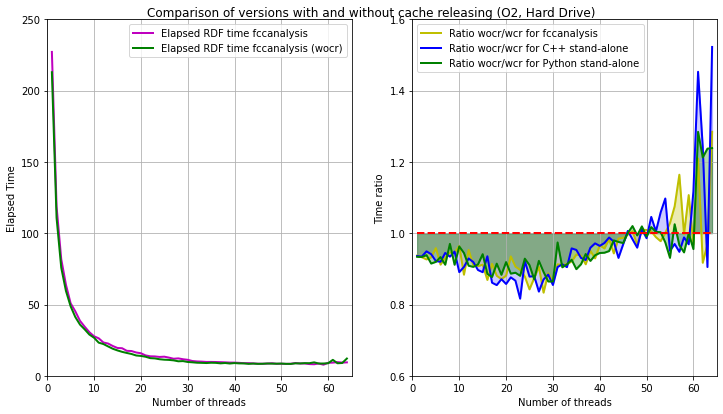

In [5]:
ones = [1.0 for _ in range(1, 65, 1)]

plt.figure(figsize=(12, 6), facecolor="white")
plt.suptitle("Comparison of versions with and without cache releasing (O2, Hard Drive)")
plt.subplots_adjust(top=0.95)

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.plot(n_threads, elapsed_fcc_hd_, color='m', label='Elapsed RDF time fccanalysis', linewidth=2)
ax1.plot(n_threads, elapsed_fcc_hd_wocr_, color='g', label='Elapsed RDF time fccanalysis (wocr)', linewidth=2)
plt.xlabel("Number of threads")
plt.ylabel("Elapsed Time")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()
# plt.show()

# # Plot 2
# ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
# ax2.plot(n_threads, elapsed_cpp_hd_, color='m', label='Elapsed RDF time C++ stand-alone', linewidth=2)
# ax2.plot(n_threads, elapsed_cpp_hd_wocr_, color='g', label='Real RDF time C++ stand-alone (wocr)', linewidth=2)
# plt.xlabel("Number of threads")
# plt.ylabel("Elapsed Time")
# plt.grid()
# plt.xlim((0, 65))
# plt.ylim((0, 250))
# plt.legend()
#
# # Plot 3
# ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
# ax3.plot(n_threads, elapsed_py_hd_, color='m', label='Elapsed RDF time Python stand-alone', linewidth=2)
# ax3.plot(n_threads, elapsed_py_hd_wocr_, color='g', label='Real RDF time Python stand-alone (wocr)', linewidth=2)
# plt.xlabel("Number of threads")
# plt.ylabel("Elapsed Time")
# plt.grid()
# plt.xlim((0, 65))
# plt.ylim((0, 250))
# plt.legend()

ax4 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax4.plot(n_threads, ratio_cr_fcc_hd_, color='y', label='Ratio wocr/wcr for fccanalysis', linewidth=2)
ax4.plot(n_threads, ratio_cr_cpp_hd_, color='b', label='Ratio wocr/wcr for C++ stand-alone', linewidth=2)
ax4.plot(n_threads, ratio_cr_py_hd_, color='g', label='Ratio wocr/wcr for Python stand-alone', linewidth=2)
ax4.plot(n_threads, ones, color='r', ls="dashed", linewidth=2)
ax4.fill_between(n_threads, ratio_cr_fcc_hd_, ones, color="y", alpha=0.3)
ax4.fill_between(n_threads, ratio_cr_cpp_hd_, ones, color="b", alpha=0.2)
ax4.fill_between(n_threads, ratio_cr_py_hd_, ones, color="g", alpha=0.3)
plt.xlabel("Number of threads")
plt.ylabel("Time ratio")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.6, 1.6))
plt.legend()

plt.savefig("/home/ihor/PycharmProjects/fccperf/plots_/cr_vs_wocr_hd.pdf", dpi=150)
plt.show()

##### Now the identity of wcr and is proved! Next we work only with wcr versions

#### Random Access Memory

In [28]:
# without cache releasing
data_fcc_wocr_    = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_ram/perf_fccanalysis_wocr.json", [1, 65, 1])
data_cpp_wocr_    = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_ram/perf_cpp_wocr.json", [1, 65, 1])
data_py_wocr_     = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_ram/perf_py_wocr.json", [1, 65, 1])

elapsed_fcc_wocr_ = data_fcc_wocr_["elapsed"]
elapsed_cpp_wocr_ = data_cpp_wocr_["elapsed"]
elapsed_py_wocr_  = data_py_wocr_["elapsed"]

evt_sec_fcc_wocr  = total_events / np.array(elapsed_fcc_wocr_)
evt_sec_cpp_wocr  = total_events / np.array(elapsed_cpp_wocr_)
evt_sec_py_wocr   = total_events / np.array(elapsed_py_wocr_)

# with cache releasing
data_fcc_         = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_ram/perf_fccanalysis.json", [1, 65, 1])
data_cpp_         = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_ram/perf_cpp.json", [1, 65, 1])
data_py_          = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_ram/perf_py.json", [1, 65, 1])

elapsed_fcc_      = data_fcc_["elapsed"]
elapsed_cpp_      = data_cpp_["elapsed"]
elapsed_py_       = data_py_["elapsed"]
real_fcc_         = data_fcc_["real_time"]
real_cpp_         = data_cpp_["real_time"]
real_py_          = data_py_["real_time"]

evt_sec_fcc_      = total_events / np.array(elapsed_fcc_)
evt_sec_cpp_      = total_events / np.array(elapsed_cpp_)
evt_sec_py_       = total_events / np.array(elapsed_py_)

diff_fcc_         = np.array(real_fcc_) - np.array(elapsed_fcc_)
diff_cpp_         = np.array(real_cpp_) - np.array(elapsed_cpp_)
diff_py_          = np.array(real_py_) - np.array(elapsed_py_)

# time ratio for different versions
ratio_fcc_cpp_    = np.array(elapsed_fcc_) / np.array(elapsed_cpp_)
ratio_fcc_py_     = np.array(elapsed_fcc_) / np.array(elapsed_py_)
ratio_cpp_py_     = np.array(elapsed_cpp_) / np.array(elapsed_py_)
print(f"Average ratio fccanalysis vs. C++: {round(np.mean(ratio_fcc_cpp_), 3)}")
print(f"Average ratio fccanalysis vs. Python: {round(np.mean(ratio_fcc_py_), 3)}")
print(f"Average ratio C++ vs. Python: {round(np.mean(ratio_cpp_py_), 3)}")

# time ratio for versions run on Hard Drive and RAM
ratio_fcc_ram_hd_ = np.array(elapsed_fcc_) / np.array(elapsed_fcc_hd_)
ratio_cpp_ram_hd_ = np.array(elapsed_cpp_) / np.array(elapsed_cpp_hd_)
ratio_py_ram_hd_ = np.array(elapsed_py_) / np.array(elapsed_py_hd_)
print(f"Average ratio for fccanalysis HD vs. RAM: {round(np.mean(ratio_fcc_ram_hd_), 3)}")
print(f"Average ratio for C++ HD vs. RAM: {round(np.mean(ratio_cpp_ram_hd_), 3)}")
print(f"Average ratio for Python HD vs. RAM: {round(np.mean(ratio_py_ram_hd_), 3)}")

Average ratio fccanalysis vs. C++: 1.036
Average ratio fccanalysis vs. Python: 1.037
Average ratio C++ vs. Python: 1.006
Average ratio for fccanalysis HD vs. RAM: 0.997
Average ratio for C++ HD vs. RAM: 1.001
Average ratio for Python HD vs. RAM: 0.95


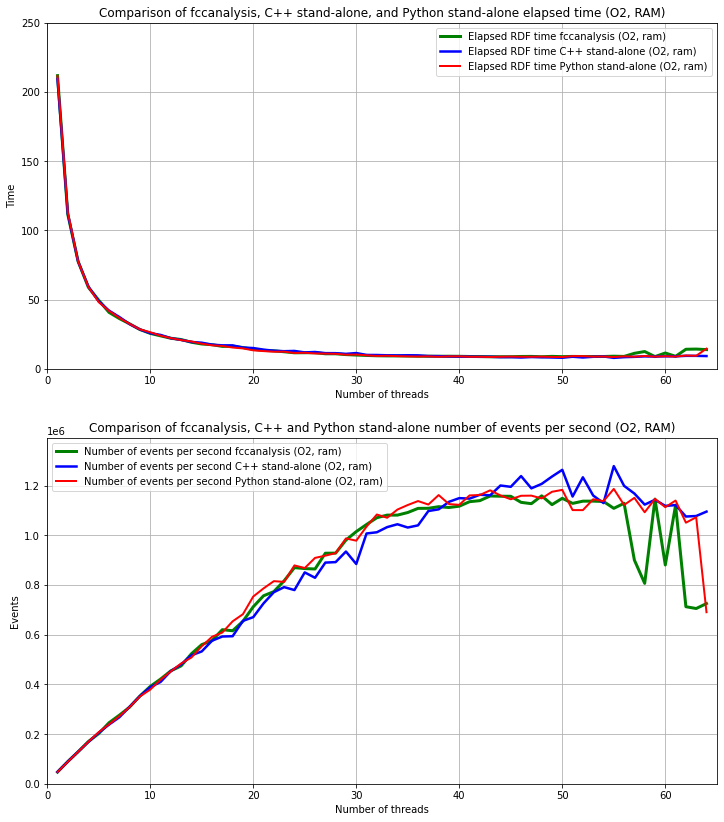

In [25]:
plt.figure(figsize=(12, 14), facecolor='white')
# ax = plt.axes()
# ax.set_yticks([i for i in range(0, 400, 10)])
# ax.set_facecolor('white')
# ax.set_alpha(0.1)
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1)
ax1.plot(n_threads, elapsed_fcc_, color='g', label='Elapsed RDF time fccanalysis (O2, ram)', linewidth=3)
ax1.plot(n_threads, elapsed_cpp_, color='b', label='Elapsed RDF time C++ stand-alone (O2, ram)', linewidth=2.5)
ax1.plot(n_threads, elapsed_py_, color='r', label='Elapsed RDF time Python stand-alone (O2, ram)', linewidth=2)
plt.xlabel("Number of threads")
plt.ylabel("Time")
plt.title("Comparison of fccanalysis, C++ stand-alone, and Python stand-alone elapsed time (O2, RAM)")
ax1.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()
# plt.show()

# Plot 2
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1)
ax2.plot(n_threads, evt_sec_fcc_, color='g', label='Number of events per second fccanalysis (O2, ram)', linewidth=3)
ax2.plot(n_threads, evt_sec_cpp_, color='b', label='Number of events per second C++ stand-alone (O2, ram)', linewidth=2.5)
ax2.plot(n_threads, evt_sec_py_,  color='r', label='Number of events per second Python stand-alone (O2, ram)', linewidth=2)
plt.xlabel("Number of threads")
plt.ylabel("Events")
plt.title("Comparison of fccanalysis, C++ and Python stand-alone number of events per second (O2, RAM)")
ax2.grid()
plt.xlim((0, 65))
plt.ylim((0, 1_392_268))
plt.legend()

plt.savefig("/home/ihor/PycharmProjects/fccperf/plots_/elapsed_events_all_O2_ram.pdf", dpi=150)
plt.show()

##### Comparison of different optimization levels

In [19]:
# C++
data_cpp_O0 = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_cpp_O0.json", [1, 65, 1])
data_cpp_O1 = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_cpp_O1.json", [1, 65, 1])
data_cpp_O2 = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_cpp_O2.json", [1, 65, 1])
data_cpp_O3 = json2dict_cpp_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_cpp_O3.json", [1, 65, 1])
elapsed_cpp_O0 = data_cpp_O0["elapsed"]
elapsed_cpp_O1 = data_cpp_O1["elapsed"]
elapsed_cpp_O2 = data_cpp_O2["elapsed"]
elapsed_cpp_O3 = data_cpp_O3["elapsed"]
evt_sec_cpp_O0 = total_events / np.array(elapsed_cpp_O0)
evt_sec_cpp_O1 = total_events / np.array(elapsed_cpp_O1)
evt_sec_cpp_O2 = total_events / np.array(elapsed_cpp_O2)
evt_sec_cpp_O3 = total_events / np.array(elapsed_cpp_O3)
# fccanalysis
data_fcc_O0 = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_fccanalysis_O0.json", [1, 65, 1])
data_fcc_O1 = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_fccanalysis_O1.json", [1, 65, 1])
data_fcc_O2 = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_fccanalysis_O2.json", [1, 65, 1])
data_fcc_O3 = json2dict_fcc_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_fccanalysis_O3.json", [1, 65, 1])
elapsed_fcc_O0 = data_fcc_O0["elapsed"]
elapsed_fcc_O1 = data_fcc_O1["elapsed"]
elapsed_fcc_O2 = data_fcc_O2["elapsed"]
elapsed_fcc_O3 = data_fcc_O3["elapsed"]
evt_sec_fcc_O0 = total_events / np.array(elapsed_fcc_O0)
evt_sec_fcc_O1 = total_events / np.array(elapsed_fcc_O1)
evt_sec_fcc_O2 = total_events / np.array(elapsed_fcc_O2)
evt_sec_fcc_O3 = total_events / np.array(elapsed_fcc_O3)
# Python
data_py_O0 = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_py_O0.json", [1, 65, 1])
data_py_O1 = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_py_O1.json", [1, 65, 1])
data_py_O2 = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_py_O2.json", [1, 65, 1])
data_py_O3 = json2dict_py_updated("/home/ihor/PycharmProjects/fccperf/json_/perf_py_O3.json", [1, 65, 1])
elapsed_py_O0 = data_py_O0["elapsed"]
elapsed_py_O1 = data_py_O1["elapsed"]
elapsed_py_O2 = data_py_O2["elapsed"]
elapsed_py_O3 = data_py_O3["elapsed"]
evt_sec_py_O0 = total_events / np.array(elapsed_py_O0)
evt_sec_py_O1 = total_events / np.array(elapsed_py_O1)
evt_sec_py_O2 = total_events / np.array(elapsed_py_O2)
evt_sec_py_O3 = total_events / np.array(elapsed_py_O3)

# Ratio for 03 versions
ratio_fcc_cpp_O3 = np.array(elapsed_fcc_O3) / np.array(elapsed_cpp_O3)
ratio_fcc_py_O3  = np.array(elapsed_fcc_O3) / np.array(elapsed_py_O3)


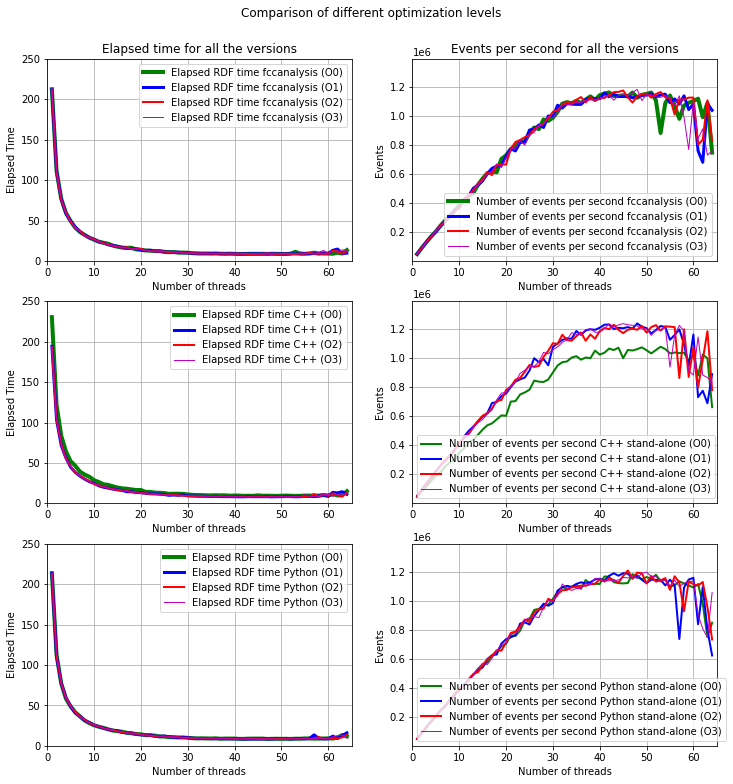

In [20]:
plt.figure(figsize=(12, 12), facecolor="white")
plt.suptitle("Comparison of different optimization levels")
plt.subplots_adjust(top=0.92)

# ===== Time =====

# Plot 0-0
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
ax1.set_title("Elapsed time for all the versions")
ax1.plot(n_threads, elapsed_fcc_O0, color='g', label='Elapsed RDF time fccanalysis (O0)', linewidth=4)
ax1.plot(n_threads, elapsed_fcc_O1, color='b', label='Elapsed RDF time fccanalysis (O1)', linewidth=3)
ax1.plot(n_threads, elapsed_fcc_O2, color='r', label='Elapsed RDF time fccanalysis (O2)', linewidth=2)
ax1.plot(n_threads, elapsed_fcc_O3, color='m', label='Elapsed RDF time fccanalysis (O3)', linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Elapsed Time")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()

# Plot 1-0
ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=1)
ax2.plot(n_threads, elapsed_cpp_O0, color='g', label='Elapsed RDF time C++ (O0)', linewidth=4)
ax2.plot(n_threads, elapsed_cpp_O1, color='b', label='Elapsed RDF time C++ (O1)', linewidth=3)
ax2.plot(n_threads, elapsed_cpp_O2, color='r', label='Elapsed RDF time C++ (O2)', linewidth=2)
ax2.plot(n_threads, elapsed_cpp_O3, color='m', label='Elapsed RDF time C++ (O3)', linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Elapsed Time")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()

# Plot 2-0
ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1)
ax3.plot(n_threads, elapsed_py_O0, color='g', label='Elapsed RDF time Python (O0)', linewidth=4)
ax3.plot(n_threads, elapsed_py_O1, color='b', label='Elapsed RDF time Python (O1)', linewidth=3)
ax3.plot(n_threads, elapsed_py_O2, color='r', label='Elapsed RDF time Python (O2)', linewidth=2)
ax3.plot(n_threads, elapsed_py_O3, color='m', label='Elapsed RDF time Python (O3)', linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Elapsed Time")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0, 250))
plt.legend()

# ===== Events =====

# Plot 0-1
ax4 = plt.subplot2grid((3, 2), (0, 1), colspan=1)
ax4.set_title("Events per second for all the versions")
ax4.plot(n_threads, evt_sec_fcc_O0, color='g', label='Number of events per second fccanalysis (O0)', linewidth=4)
ax4.plot(n_threads, evt_sec_fcc_O1, color='b', label='Number of events per second fccanalysis (O1)', linewidth=3)
ax4.plot(n_threads, evt_sec_fcc_O2, color='r', label='Number of events per second fccanalysis (O2)', linewidth=2)
ax4.plot(n_threads, evt_sec_fcc_O3, color='m', label='Number of events per second fccanalysis (O3)', linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Events")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.6, 1_392_268))
plt.legend()

# Plot 1-1
ax5 = plt.subplot2grid((3, 2), (1, 1), colspan=1)
ax5.plot(n_threads, evt_sec_cpp_O0, color='g', label='Number of events per second C++ stand-alone (O0)', linewidth=2)
ax5.plot(n_threads, evt_sec_cpp_O1, color='b', label='Number of events per second C++ stand-alone (O1)', linewidth=2)
ax5.plot(n_threads, evt_sec_cpp_O2, color='r', label='Number of events per second C++ stand-alone (O2)', linewidth=2)
ax5.plot(n_threads, evt_sec_cpp_O3, color='m', label='Number of events per second C++ stand-alone (O3)', linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Events")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.6, 1_392_268))
plt.legend()

# Plot 2-1
ax6 = plt.subplot2grid((3, 2), (2, 1), colspan=1)
ax6.plot(n_threads, evt_sec_py_O0, color='g', label='Number of events per second Python stand-alone (O0)', linewidth=2)
ax6.plot(n_threads, evt_sec_py_O1, color='b', label='Number of events per second Python stand-alone (O1)', linewidth=2)
ax6.plot(n_threads, evt_sec_py_O2, color='r', label='Number of events per second Python stand-alone (O2)', linewidth=2)
ax6.plot(n_threads, evt_sec_py_O3, color='m', label='Number of events per second Python stand-alone (O3)', linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Events")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.6, 1_392_268))
plt.legend()

plt.savefig("/home/ihor/PycharmProjects/fccperf/plots_/optimizer_levels.pdf", dpi=150)
plt.show()

### Comparison between fccanalysis, C++, and Python stand-alone scripts for standard configuration (O2, ram)

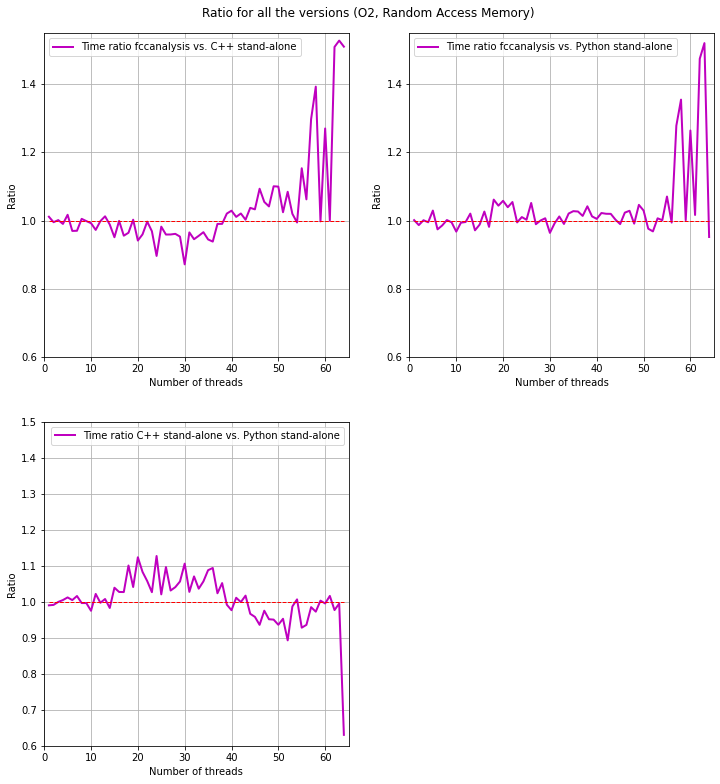

In [27]:
# put here ratios fcc vs. cpp, fcc vs. py, and cpp vs. py

plt.figure(figsize=(12, 12), facecolor="white")
plt.suptitle("Ratio for all the versions (O2, Random Access Memory)")
plt.subplots_adjust(top=0.95)

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax1.plot(n_threads, ratio_fcc_cpp_, color='m', label='Time ratio fccanalysis vs. C++ stand-alone', linewidth=2)
ax1.plot(n_threads, ones, color='r', ls="dashed", linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Ratio")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.6, 1.55))
plt.legend()
# plt.show()

# Plot 2
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax2.plot(n_threads, ratio_fcc_py_, color='m', label='Time ratio fccanalysis vs. Python stand-alone', linewidth=2)
ax2.plot(n_threads, ones, color='r', ls="dashed", linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Ratio")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.6, 1.55))
plt.legend()

# Plot 3
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax3.plot(n_threads, ratio_cpp_py_, color='m', label='Time ratio C++ stand-alone vs. Python stand-alone', linewidth=2)
ax3.plot(n_threads, ones, color='r', ls="dashed", linewidth=1)
plt.xlabel("Number of threads")
plt.ylabel("Ratio")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.6, 1.5))
plt.legend()

# ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

plt.savefig("/home/ihor/PycharmProjects/fccperf/plots_/ratio_all_versions_ram.pdf", dpi=150)
plt.show()

### Comparison HD vs. RAM

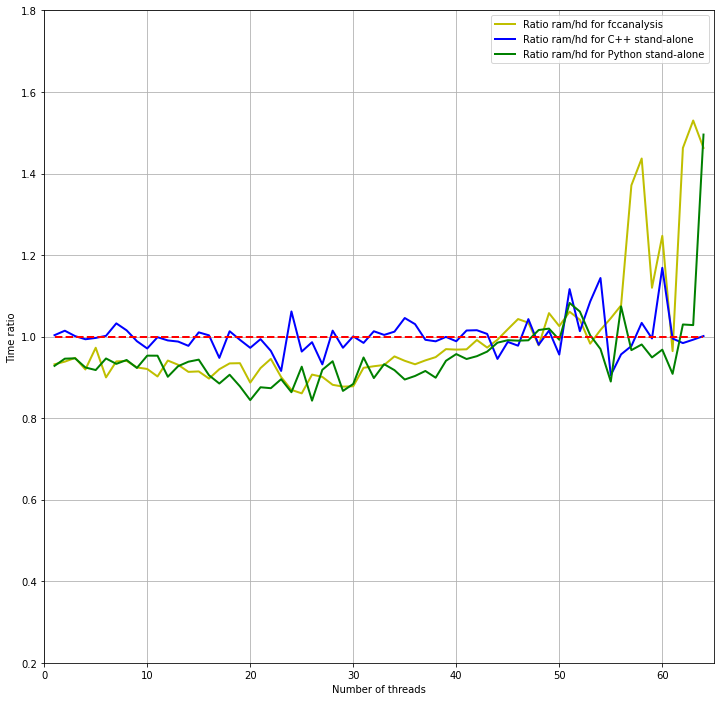

In [33]:
plt.figure(figsize=(12, 12), facecolor="white")
plt.plot(n_threads, ratio_fcc_ram_hd_, color='y', label='Ratio ram/hd for fccanalysis', linewidth=2)
plt.plot(n_threads, ratio_cpp_ram_hd_, color='b', label='Ratio ram/hd for C++ stand-alone', linewidth=2)
plt.plot(n_threads, ratio_py_ram_hd_, color='g', label='Ratio ram/hd for Python stand-alone', linewidth=2)
plt.plot(n_threads, ones, color='r', ls="dashed", linewidth=2)
# plt.fill_between(n_threads, ratio_fcc_ram_hd_, ones, color="y", alpha=0.3)
# plt.fill_between(n_threads, ratio_cpp_ram_hd_, ones, color="b", alpha=0.2)
# plt.fill_between(n_threads, ratio_py_ram_hd_, ones, color="g", alpha=0.3)
plt.xlabel("Number of threads")
plt.ylabel("Time ratio")
plt.grid()
plt.xlim((0, 65))
plt.ylim((0.2, 1.8))
plt.legend()

plt.savefig("/home/ihor/PycharmProjects/fccperf/plots_/ram_vs_hd.pdf", dpi=150)
plt.show()